In [1]:
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)

# worksheet = gc.open('REVISED subset cities commute').sheet1

# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# # print(rows)

# Convert to a DataFrame and render.
import pandas as pd
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnDvWy-tH9hL8Gh6BoVTve_g1ueI_leMnmG8idP9fJ31AF99SmZhEmeirRjGsSWlK0nvsxtCEn6ZE6/pub?output=csv')
# new_header = data.iloc[0] #grab the first row for the header
# data = data[1:] #take the data less the header row
# data.columns = new_header #set the header row as the df header
data['zip'] = '0' + data['zip'].astype(str)
data

,Destination,zip,Departure Time,Driving_1,Transit_1,Difference_Driving_Transit_1,Walking_1,Departure Time.1,Driving_2,Transit_2,Difference_Driving_Transit_2,Walking_2
0,Traffic Engineering (700 Allens Avenue),02860,12:00 PM,13.0,41.0,28,114.0,6:00 PM,15.0,39.0,24,114.0
1,Traffic Engineering (700 Allens Avenue),02903,12:00 PM,6.5,12.0,5.5,35.0,6:00 PM,6.0,12.0,6,35.0
2,Traffic Engineering (700 Allens Avenue),02904,12:00 PM,10.0,46.0,36,122.0,6:00 PM,11.0,42.0,31,122.0
3,Traffic Engineering (700 Allens Avenue),02905,12:00 PM,3.0,5.0,2,12.0,6:00 PM,3.0,5.0,2,12.0
4,Traffic Engineering (700 Allens Avenue),02906,12:00 PM,12.0,47.0,35,79.0,6:00 PM,12.0,44.0,32,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,02910,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
61,NaN,02911,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
62,NaN,02912,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
63,NaN,02919,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN


In [2]:
data['time_difference1'] = data['Transit_1'] - data['Driving_1']
data['time_difference2'] = data['Transit_2'] - data['Driving_2']

In [3]:
import geopandas as gpd
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
zipcodes = gpd.read_file('shapefiles/Zip Codes/geo_export_7b90692b-83fc-4198-a66c-777f7ea4963d.shp')


In [5]:
zipcodes

,id,shape_area,shape_len,zip,geometry
0,0.0,1.131587e+08,40803.472849,02906,"POLYGON ((-71.39953 41.85678, -71.39894 41.856..."
1,0.0,5.268494e+07,36265.753229,02903,"POLYGON ((-71.38455 41.82055, -71.38505 41.820..."
2,0.0,8.107660e+07,44828.574315,02905,"POLYGON ((-71.39280 41.81479, -71.39300 41.814..."
3,0.0,8.498355e+07,49870.972408,02907,"POLYGON ((-71.40428 41.78585, -71.40428 41.785..."
4,0.0,9.531627e+07,56420.279438,02909,"POLYGON ((-71.43381 41.82737, -71.43371 41.827..."
5,0.0,9.040451e+07,53186.731649,02908,"MULTIPOLYGON (((-71.44741 41.85361, -71.44714 ..."
6,0.0,5.543558e+07,46174.069575,02904,"POLYGON ((-71.44708 41.85382, -71.44677 41.854..."


In [6]:
traffic_eng_gdf = zipcodes.merge(data.loc[data.Destination == 'Traffic Engineering (700 Allens Avenue) '], on="zip")

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='Driving_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Travel Time (Min) to Traffic Engineering by Car, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_driving_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='Transit_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Travel Time (Min) to Traffic Engineering by Transit, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_transit_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='Walking_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Travel Time (Min) to Traffic Engineering by Walking, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_walking_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='Driving_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Travel Time (Min) to Traffic Engineering by Car, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_driving_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='Transit_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Travel Time (Min) to Traffic Engineering by Transit, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_transit_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='Walking_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Travel Time (Min) to Traffic Engineering by Walking, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_walking_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='time_difference1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Difference in Travel Times (Transit versus Car) to Traffic Engineering, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_time_difference1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
traffic_eng_gdf.plot(column='time_difference2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title('Difference in Travel Times (Transit versus Car) to Traffic Engineering, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig('Visualizations/traffic_eng_time_difference2.png',bbox_inches = 'tight')
plt.close()

In [7]:
muni_court_gdf = zipcodes.merge(data.loc[data.Destination == 'Municipal Court (325 Washington Street)'], on="zip")

filename = 'muni_court'
location = 'Municipal Court'

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='Driving_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Car, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_driving_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='Transit_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Transit, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_transit_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='Walking_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Walking, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_walking_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='Driving_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Car, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_driving_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='Transit_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Transit, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_transit_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='Walking_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Walking, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_walking_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='time_difference1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Difference in Travel Times (Transit versus Car) to {location}, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_time_difference1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
muni_court_gdf.plot(column='time_difference2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Difference in Travel Times (Transit versus Car) to {location}, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_time_difference2.png',bbox_inches = 'tight')
plt.close()

In [8]:
hospital_dist_gdf = zipcodes.merge(data.loc[data.Destination == 'Hospital District'], on="zip")

filename = 'hospital_dist'
location = 'Hospital District'

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='Driving_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Car, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_driving_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='Transit_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Transit, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_transit_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='Walking_1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Walking, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_walking_1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='Driving_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Car, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_driving_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='Transit_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Transit, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_transit_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='Walking_2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Travel Time (Min) to {location} by Walking, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_walking_2.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='time_difference1',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Difference in Travel Times (Transit versus Car) to {location}, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_time_difference1.png',bbox_inches = 'tight')
plt.close()

fig,ax = plt.subplots(1,figsize=(10,6))
hospital_dist_gdf.plot(column='time_difference2',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax)
ax.axis('off')
ax.set_title(f'Difference in Travel Times (Transit versus Car) to {location}, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})
fig.savefig(f'Visualizations/{filename}_time_difference2.png',bbox_inches = 'tight')
plt.close()

In [9]:
test = traffic_eng_gdf[['zip','Driving_1','Transit_1','time_difference1','Driving_2','Transit_2','time_difference2']].merge(muni_court_gdf[['zip','Driving_1','Transit_1','time_difference1','Driving_2','Transit_2','time_difference2']],on='zip',suffixes=['_traff_eng','_muni_court'])
hosp_test = hospital_dist_gdf[['zip','Driving_1','Transit_1','time_difference1','Driving_2','Transit_2','time_difference2']].rename(columns = {'Driving_1':'Driving_1_hosp_dist','Transit_1':'Transit_1_hosp_dist','time_difference1':'time_difference1_hosp_dist','Driving_2':'Driving_2_hosp_dist','Transit_2':'Transit_2_hosp_dist','time_difference2':'time_difference2_hosp_dist'})
test = test.merge(hosp_test,on='zip')
test[['zip','time_difference1_traff_eng','time_difference1_muni_court','time_difference1_hosp_dist']]

,zip,time_difference1_traff_eng,time_difference1_muni_court,time_difference1_hosp_dist
0,02906,35.0,13.0,21.0
1,02903,5.5,13.0,4.0
2,02905,2.0,22.5,3.0
3,02907,28.0,13.0,21.0
4,02909,37.5,14.0,30.5
5,02908,29.5,22.0,27.5
6,02904,36.0,40.5,29.0


In [14]:
fig,ax = plt.subplots(1,figsize=(10,6))
test.plot(x="zip", y=["time_difference1_traff_eng", "time_difference1_muni_court",'time_difference1_hosp_dist'], kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['Traffic Engineering','Municipal Court', 'Hospital District'])
ax.set_title(f'Google Maps Analysis, 12PM', fontdict={'fontsize': '13', 'fontweight' : '3'})

# plt.show()
fig.savefig('Visualizations/travel_differences_1.png',bbox_inches = 'tight')
plt.close()

In [15]:
test[['zip','time_difference2_traff_eng','time_difference2_muni_court','time_difference2_hosp_dist']]

,zip,time_difference2_traff_eng,time_difference2_muni_court,time_difference2_hosp_dist
0,02906,32.0,11.0,19.0
1,02903,6.0,14.5,3.0
2,02905,2.0,20.5,4.0
3,02907,42.0,20.5,26.0
4,02909,44.0,12.0,24.5
5,02908,26.5,19.0,22.5
6,02904,31.0,38.5,26.0


In [16]:
fig,ax = plt.subplots(1,figsize=(10,6))
test.plot(x="zip", y=["time_difference2_traff_eng", "time_difference2_muni_court",'time_difference2_hosp_dist'], kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['Traffic Engineering','Municipal Court', 'Hospital District'])
ax.set_title(f'Google Maps Analysis, 6PM', fontdict={'fontsize': '13', 'fontweight' : '3'})

# plt.show()
fig.savefig('Visualizations/travel_differences_2.png',bbox_inches = 'tight')
plt.close()

In [17]:
data['pct_diff_1'] = data.time_difference1/((data.Transit_1 + data.Driving_1)/2) * 100

<AxesSubplot:xlabel='zip'>

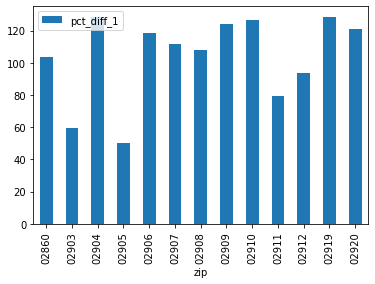

In [21]:
data[data.Destination == 'Traffic Engineering (700 Allens Avenue) '].plot.bar(x='zip',y='pct_diff_1')